#  AED Location Optimization Analysis

## 1. Data Loading and Preprocessing

In this section, we'll load the necessary data and perform initial data cleaning and preprocessing.

In [3]:
import pandas as pd
import geopandas as gpd
import os

# Set paths
input_path = '/Users/Zhuanz/数字游民/mda 项目/mda_project/data/processed'
output_path = '/Users/Zhuanz/数字游民/mda 项目/mda_project/data/output'

# Check if files exist and print their basic info
files_to_check = ['rta_df.csv', 'total_df_with_distances.csv', 'België.json', 'BELGIUM_-_Provinces.geojson']

for file in files_to_check:
    file_path = os.path.join(input_path, file)
    if os.path.exists(file_path):
        print(f"File {file} exists.")
        if file.endswith('.csv'):
            df = pd.read_csv(file_path)
            print(f"Columns in {file}:")
            print(df.columns)
            print(f"Shape of {file}: {df.shape}")
        elif file.endswith('.json') or file.endswith('.geojson'):
            gdf = gpd.read_file(file_path)
            print(f"Columns in {file}:")
            print(gdf.columns)
            print(f"CRS of {file}: {gdf.crs}")
            print(f"Shape of {file}: {gdf.shape}")
    else:
        print(f"File {file} does not exist in the specified path.")
    print("\n")

# Load data
interventions_data = pd.read_csv(os.path.join(input_path, 'rta_df.csv'))
aed_data = pd.read_csv(os.path.join(input_path, 'total_df_with_distances.csv'))

# Check if 'Latitude' and 'Longitude' columns exist
print("Columns in interventions_data:")
print(interventions_data.columns)
print("\nColumns in aed_data:")
print(aed_data.columns)

# Data preprocessing
interventions = interventions_data[interventions_data['Intervention'] == 1].copy()
aeds = aed_data[aed_data['AED'] == 1].copy()

# Convert to GeoDataFrame only if 'Latitude' and 'Longitude' columns exist
if 'Latitude' in interventions.columns and 'Longitude' in interventions.columns:
    gdf_interventions = gpd.GeoDataFrame(
        interventions, 
        geometry=gpd.points_from_xy(interventions.Longitude, interventions.Latitude),
        crs="EPSG:4326"
    )
else:
    print("Warning: 'Latitude' or 'Longitude' columns not found in interventions data.")

if 'Latitude' in aeds.columns and 'Longitude' in aeds.columns:
    gdf_aeds = gpd.GeoDataFrame(
        aeds, 
        geometry=gpd.points_from_xy(aeds.Longitude, aeds.Latitude),
        crs="EPSG:4326"
    )
else:
    print("Warning: 'Latitude' or 'Longitude' columns not found in AED data.")

# Load and check boundary files
belgium_boundary = gpd.read_file(os.path.join(input_path, 'België.json'))
belgium_provinces = gpd.read_file(os.path.join(input_path, 'BELGIUM_-_Provinces.geojson'))

print("CRS of belgium_boundary:", belgium_boundary.crs)
print("CRS of belgium_provinces:", belgium_provinces.crs)

# If CRS is not set, set it to a default (assuming WGS84)
if belgium_boundary.crs is None:
    belgium_boundary = belgium_boundary.set_crs("EPSG:4326")
if belgium_provinces.crs is None:
    belgium_provinces = belgium_provinces.set_crs("EPSG:4326")

print("Data loading and preprocessing completed")

File rta_df.csv exists.
Columns in rta_df.csv:
Index(['Mission ID', 'Latitude', 'Longitude', 'Intervention', 'Eventlevel',
       'T3-T0', 'EventType', 'Vector type', 'AED', 'Ambulance', 'Mug', 'PIT',
       'Province', 'distance_to_aed', 'distance_to_ambulance',
       'distance_to_mug', 'distance_to_pit', 'RT_category'],
      dtype='object')
Shape of rta_df.csv: (11181, 18)


File total_df_with_distances.csv exists.
Columns in total_df_with_distances.csv:
Index(['Mission ID', 'Latitude', 'Longitude', 'Intervention', 'Eventlevel',
       'T3-T0', 'EventType', 'Vector type', 'AED', 'Ambulance', 'Mug', 'PIT',
       'Province', 'distance_to_aed', 'distance_to_ambulance',
       'distance_to_mug', 'distance_to_pit'],
      dtype='object')
Shape of total_df_with_distances.csv: (26600, 17)


File België.json exists.
Columns in België.json:
Index(['id', 'ID_0', 'ISO', 'NAME_0', 'geometry'], dtype='object')
CRS of België.json: None
Shape of België.json: (1, 5)


File BELGIUM_-_Provinces.geo

Data loading and preprocessing completed
Number of intervention data points: 11181
Number of AEDs: 13916

Intervention data basic statistics:


,T3-T0,distance_to_aed
count,11181.000000,11181.000000
mean,13.802409,0.589838
std,6.164356,0.688907
min,0.616667,0.000082
25%,9.671900,0.191061
50%,12.593333,0.373526
75%,16.347017,0.701170
max,43.566667,16.058166



AED data basic statistics:


,Latitude,Longitude
count,13916.000000,13916.000000
mean,50.791729,4.498374
std,0.335322,0.755717
min,49.506819,2.582286
25%,50.597477,4.135403
50%,50.840577,4.421901
75%,51.036488,4.998875
max,51.496268,6.344506


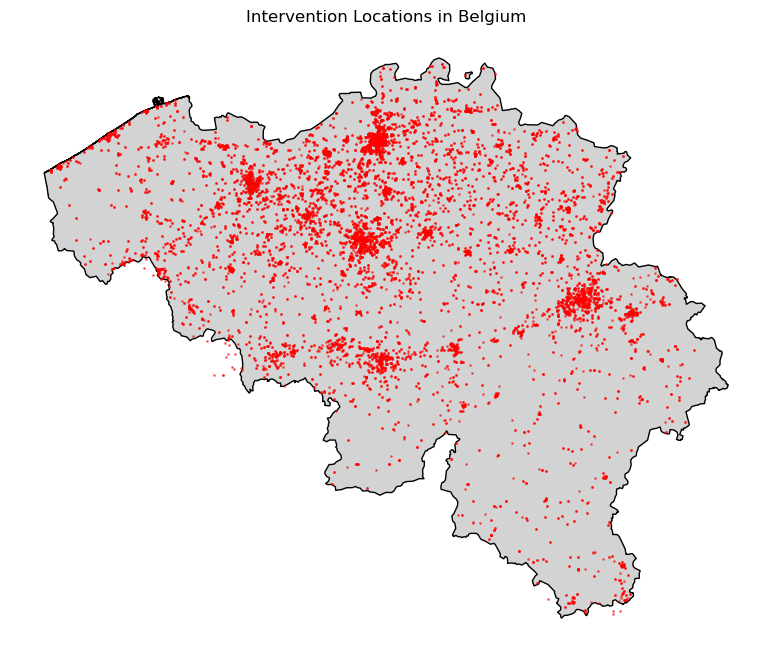

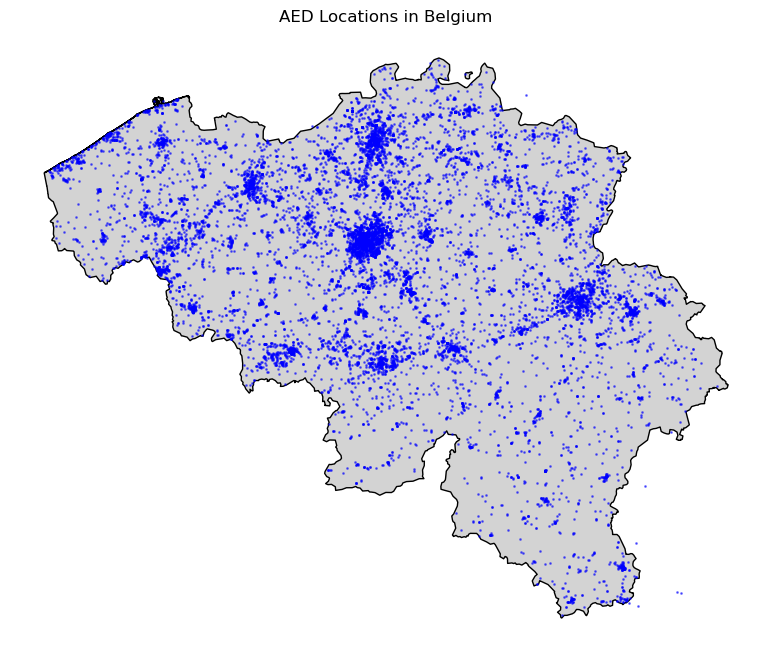

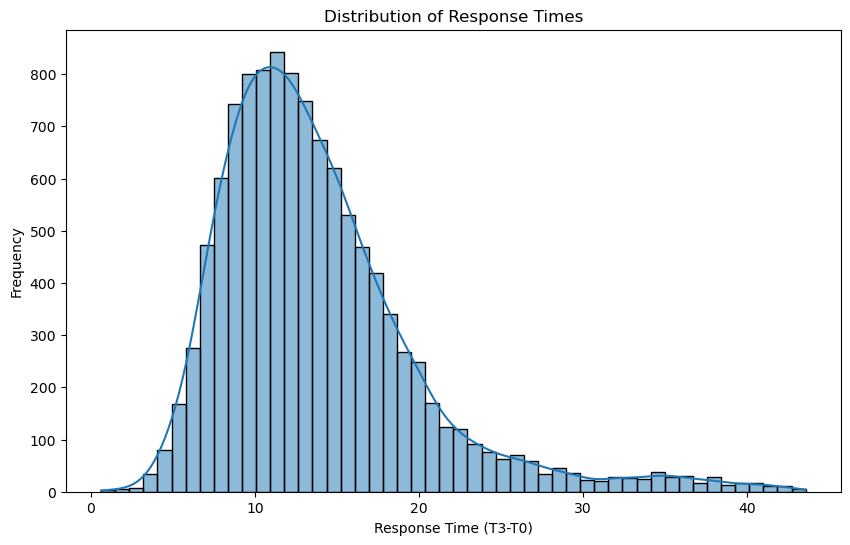

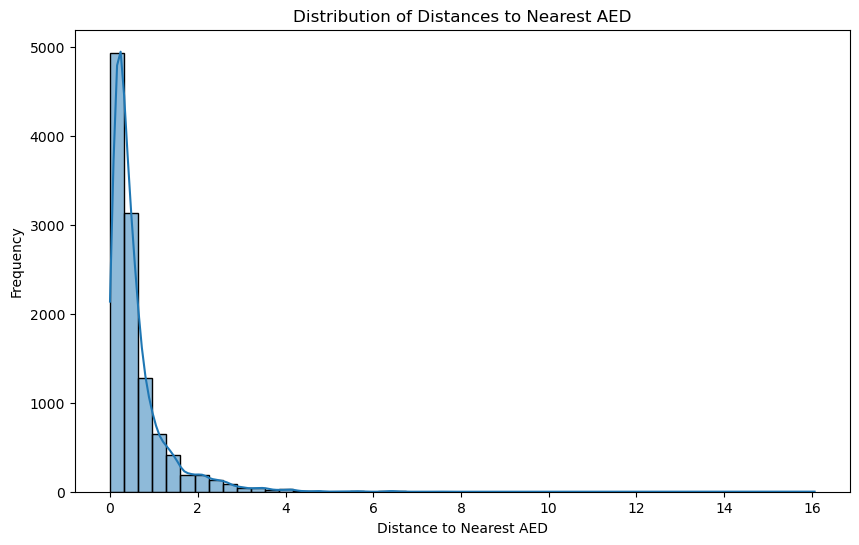

Analysis of current situation completed


In [5]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

# Set paths
input_path = '/Users/Zhuanz/数字游民/mda 项目/mda_project/data/processed'
output_path = '/Users/Zhuanz/数字游民/mda 项目/mda_project/data/output'

# Load data
interventions_data = pd.read_csv(os.path.join(input_path, 'rta_df.csv'))
aed_data = pd.read_csv(os.path.join(input_path, 'total_df_with_distances.csv'))
belgium_boundary = gpd.read_file(os.path.join(input_path, 'België.json'))
belgium_provinces = gpd.read_file(os.path.join(input_path, 'BELGIUM_-_Provinces.geojson'))

# Set CRS for belgium_boundary
belgium_boundary = belgium_boundary.set_crs("EPSG:4326")

# Data preprocessing
interventions = interventions_data[interventions_data['Intervention'] == 1].copy()
aeds = aed_data[aed_data['AED'] == 1].copy()

# Convert to GeoDataFrame
gdf_interventions = gpd.GeoDataFrame(
    interventions, 
    geometry=gpd.points_from_xy(interventions.Longitude, interventions.Latitude),
    crs="EPSG:4326"
)
gdf_aeds = gpd.GeoDataFrame(
    aeds, 
    geometry=gpd.points_from_xy(aeds.Longitude, aeds.Latitude),
    crs="EPSG:4326"
)

print("Data loading and preprocessing completed")
print(f"Number of intervention data points: {len(gdf_interventions)}")
print(f"Number of AEDs: {len(gdf_aeds)}")

# Basic statistics
print("\nIntervention data basic statistics:")
display(gdf_interventions[['T3-T0', 'distance_to_aed']].describe())

print("\nAED data basic statistics:")
display(gdf_aeds[['Latitude', 'Longitude']].describe())

# Visualize intervention locations
plt.figure(figsize=(12, 8))
belgium_boundary.plot(ax=plt.gca(), color='lightgrey', edgecolor='black')
gdf_interventions.plot(ax=plt.gca(), color='red', alpha=0.5, markersize=1)
plt.title('Intervention Locations in Belgium')
plt.axis('off')
plt.show()

# Visualize AED locations
plt.figure(figsize=(12, 8))
belgium_boundary.plot(ax=plt.gca(), color='lightgrey', edgecolor='black')
gdf_aeds.plot(ax=plt.gca(), color='blue', alpha=0.5, markersize=1)
plt.title('AED Locations in Belgium')
plt.axis('off')
plt.show()

# Distribution of response times
plt.figure(figsize=(10, 6))
sns.histplot(data=gdf_interventions, x='T3-T0', bins=50, kde=True)
plt.title('Distribution of Response Times')
plt.xlabel('Response Time (T3-T0)')
plt.ylabel('Frequency')
plt.show()

# Distribution of distances to nearest AED
plt.figure(figsize=(10, 6))
sns.histplot(data=gdf_interventions, x='distance_to_aed', bins=50, kde=True)
plt.title('Distribution of Distances to Nearest AED')
plt.xlabel('Distance to Nearest AED')
plt.ylabel('Frequency')
plt.show()

print("Analysis of current situation completed")

## 2. Evaluating Current AED Coverage and Identifying High-Demand Areas

Interventions data shape: (11181, 18)

Interventions data columns:
Index(['Mission ID', 'Latitude', 'Longitude', 'Intervention', 'Eventlevel',
       'T3-T0', 'EventType', 'Vector type', 'AED', 'Ambulance', 'Mug', 'PIT',
       'Province', 'distance_to_aed', 'distance_to_ambulance',
       'distance_to_mug', 'distance_to_pit', 'RT_category'],
      dtype='object')

AED data shape: (26600, 17)

AED data columns:
Index(['Mission ID', 'Latitude', 'Longitude', 'Intervention', 'Eventlevel',
       'T3-T0', 'EventType', 'Vector type', 'AED', 'Ambulance', 'Mug', 'PIT',
       'Province', 'distance_to_aed', 'distance_to_ambulance',
       'distance_to_mug', 'distance_to_pit'],
      dtype='object')

Missing values in interventions data:
Mission ID               0
Latitude                 0
Longitude                0
Intervention             0
Eventlevel               0
T3-T0                    0
EventType                0
Vector type              0
AED                      0
Ambulance         

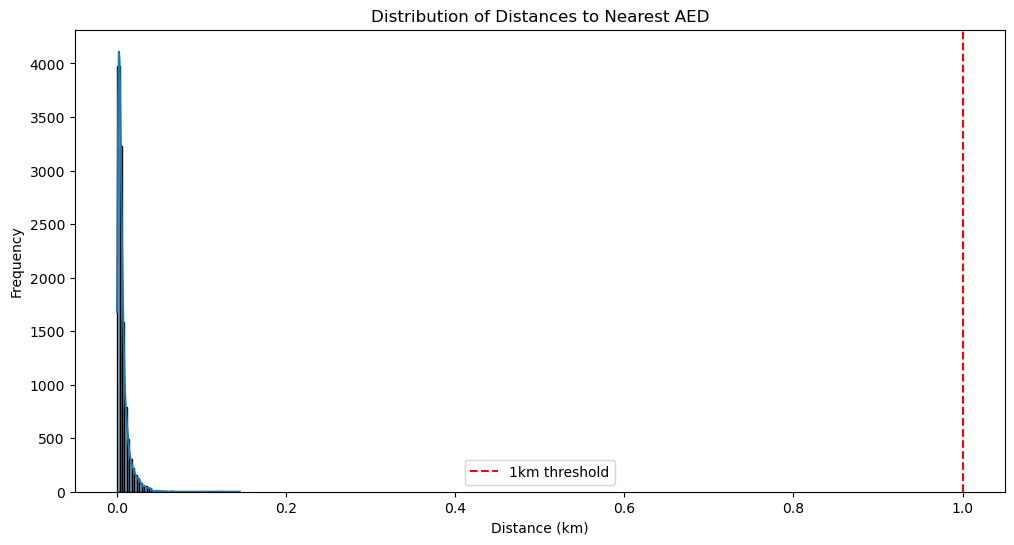


Intervention data basic statistics:


,T3-T0,distance_to_aed
count,11181.000000,11181.000000
mean,13.802409,0.589838
std,6.164356,0.688907
min,0.616667,0.000082
25%,9.671900,0.191061
50%,12.593333,0.373526
75%,16.347017,0.701170
max,43.566667,16.058166



AED data basic statistics:


,Latitude,Longitude
count,13916.000000,13916.000000
mean,50.791729,4.498374
std,0.335322,0.755717
min,49.506819,2.582286
25%,50.597477,4.135403
50%,50.840577,4.421901
75%,51.036488,4.998875
max,51.496268,6.344506


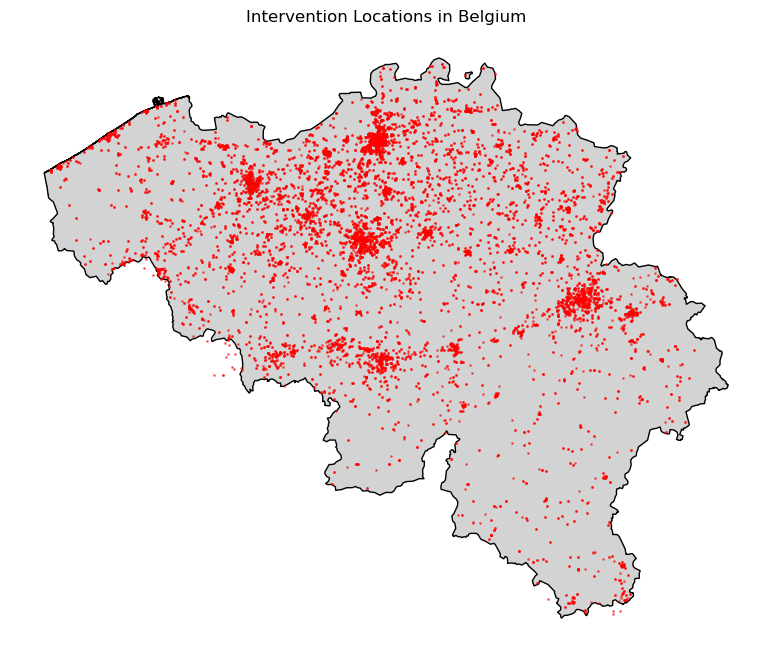

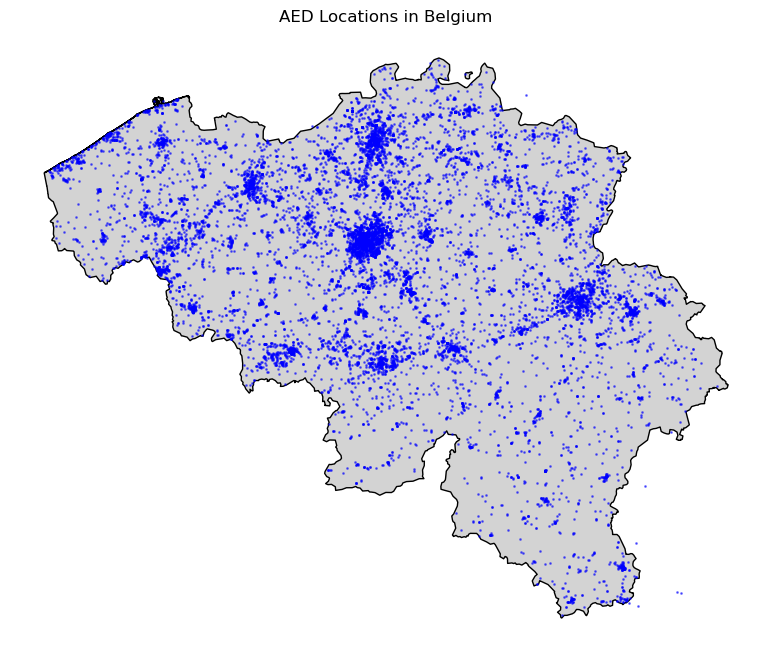

Data exploration and basic analysis completed


In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.spatial import cKDTree
import os

%matplotlib inline

# Set paths
input_path = '/Users/Zhuanz/数字游民/mda 项目/mda_project/data/processed'
output_path = '/Users/Zhuanz/数字游民/mda 项目/mda_project/data/output'

# Load data
interventions_data = pd.read_csv(os.path.join(input_path, 'rta_df.csv'))
aed_data = pd.read_csv(os.path.join(input_path, 'total_df_with_distances.csv'))
belgium_boundary = gpd.read_file(os.path.join(input_path, 'België.json'))

# Print basic information about the datasets
print("Interventions data shape:", interventions_data.shape)
print("\nInterventions data columns:")
print(interventions_data.columns)
print("\nAED data shape:", aed_data.shape)
print("\nAED data columns:")
print(aed_data.columns)

# Check for missing values
print("\nMissing values in interventions data:")
print(interventions_data.isnull().sum())
print("\nMissing values in AED data:")
print(aed_data.isnull().sum())

# Data preprocessing
interventions = interventions_data[interventions_data['Intervention'] == 1].copy()
aeds = aed_data[aed_data['AED'] == 1].copy()

# Convert to GeoDataFrame
gdf_interventions = gpd.GeoDataFrame(
    interventions, 
    geometry=gpd.points_from_xy(interventions.Longitude, interventions.Latitude),
    crs="EPSG:4326"
)
gdf_aeds = gpd.GeoDataFrame(
    aeds, 
    geometry=gpd.points_from_xy(aeds.Longitude, aeds.Latitude),
    crs="EPSG:4326"
)

print("\nProcessed interventions data shape:", gdf_interventions.shape)
print("Processed AED data shape:", gdf_aeds.shape)

# Function to calculate coverage
def calculate_coverage(gdf_interventions, gdf_aeds, max_distance=1.0):
    """Calculate the coverage of AEDs within a specified distance."""
    interventions_coords = np.dstack([gdf_interventions.geometry.x, gdf_interventions.geometry.y])[0]
    aeds_coords = np.dstack([gdf_aeds.geometry.x, gdf_aeds.geometry.y])[0]
    
    tree = cKDTree(aeds_coords)
    distances, _ = tree.query(interventions_coords)
    
    covered = distances <= max_distance
    coverage_rate = covered.mean()
    
    return coverage_rate, distances

# Calculate current coverage
coverage_rate, distances = calculate_coverage(gdf_interventions, gdf_aeds)

print(f"\nCurrent AED coverage rate (within 1km): {coverage_rate:.2%}")

# Visualize AED coverage
plt.figure(figsize=(12, 6))
sns.histplot(distances, bins=50, kde=True)
plt.axvline(1.0, color='r', linestyle='--', label='1km threshold')
plt.title('Distribution of Distances to Nearest AED')
plt.xlabel('Distance (km)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Basic statistics
print("\nIntervention data basic statistics:")
display(gdf_interventions[['T3-T0', 'distance_to_aed']].describe())

print("\nAED data basic statistics:")
display(gdf_aeds[['Latitude', 'Longitude']].describe())

# Visualize intervention locations
plt.figure(figsize=(12, 8))
belgium_boundary.plot(ax=plt.gca(), color='lightgrey', edgecolor='black')
gdf_interventions.plot(ax=plt.gca(), color='red', alpha=0.5, markersize=1)
plt.title('Intervention Locations in Belgium')
plt.axis('off')
plt.show()

# Visualize AED locations
plt.figure(figsize=(12, 8))
belgium_boundary.plot(ax=plt.gca(), color='lightgrey', edgecolor='black')
gdf_aeds.plot(ax=plt.gca(), color='blue', alpha=0.5, markersize=1)
plt.title('AED Locations in Belgium')
plt.axis('off')
plt.show()

print("Data exploration and basic analysis completed")

Starting extended analysis of AED coverage and high-demand areas


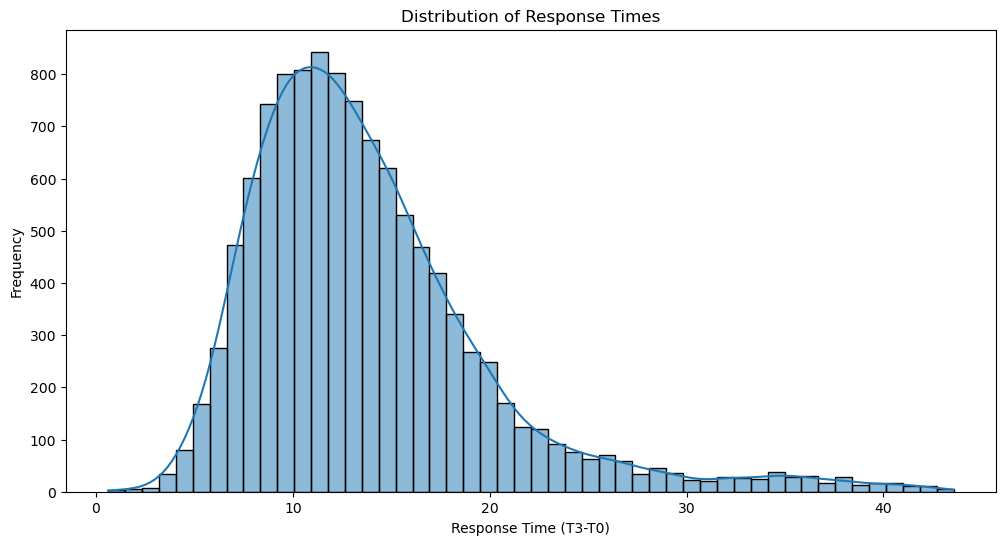

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import geopandas as gpd
from shapely.geometry import Point, box
%matplotlib inline

# Ensure gdf_interventions, gdf_aeds, and belgium_boundary are correctly loaded

print("Starting extended analysis of AED coverage and high-demand areas")

# 1. Analyze the distribution of response times
plt.figure(figsize=(12, 6))
sns.histplot(data=gdf_interventions, x='T3-T0', bins=50, kde=True)
plt.title('Distribution of Response Times')
plt.xlabel('Response Time (T3-T0)')
plt.ylabel('Frequency')
plt.show()

# 2. Analyze the relationship between response time and distance to nearest AED

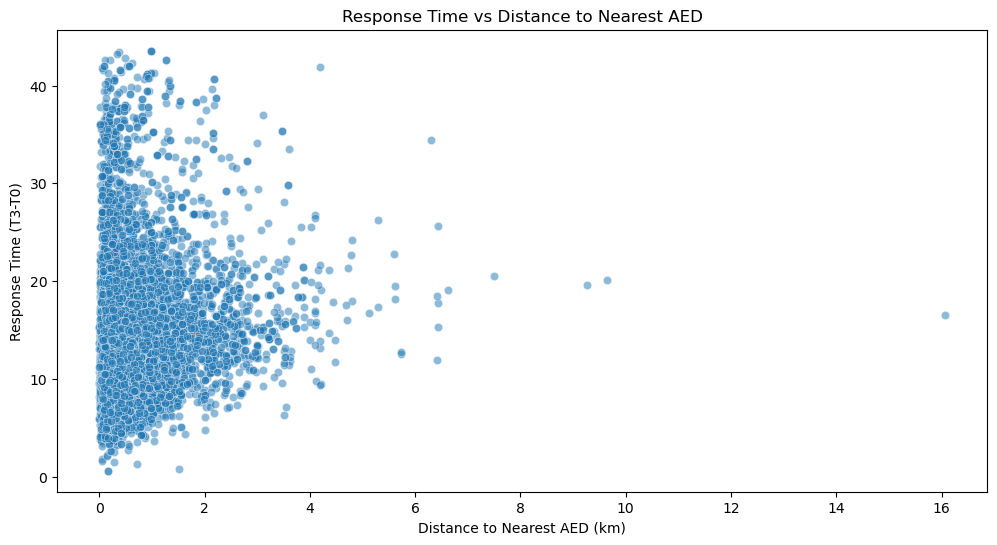

In [5]:

plt.figure(figsize=(12, 6))
sns.scatterplot(data=gdf_interventions, x='distance_to_aed', y='T3-T0', alpha=0.5)
plt.title('Response Time vs Distance to Nearest AED')
plt.xlabel('Distance to Nearest AED (km)')
plt.ylabel('Response Time (T3-T0)')
plt.show()

# 3. Identify areas with longer response times

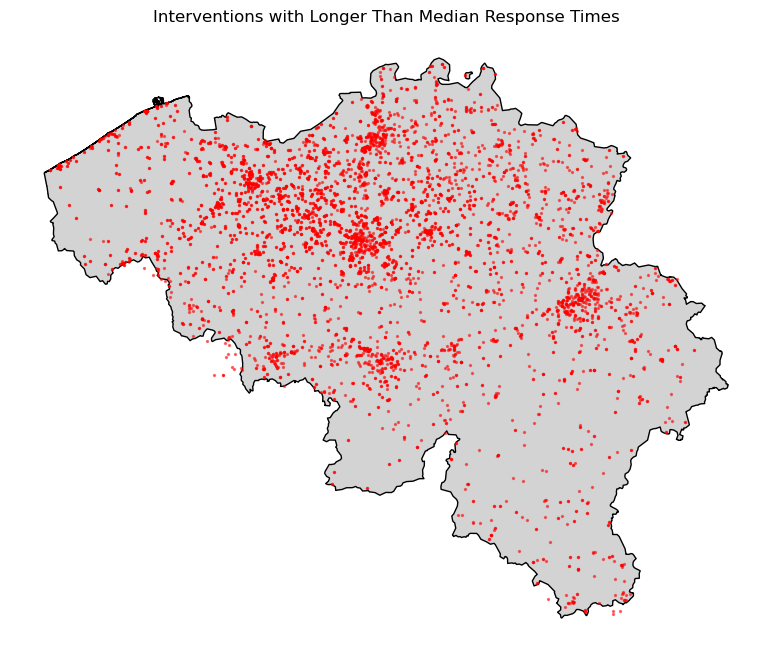

In [6]:
long_response_time = gdf_interventions[gdf_interventions['T3-T0'] > gdf_interventions['T3-T0'].median()]
plt.figure(figsize=(12, 8))
belgium_boundary.plot(ax=plt.gca(), color='lightgrey', edgecolor='black')
long_response_time.plot(ax=plt.gca(), color='red', alpha=0.5, markersize=2)
plt.title('Interventions with Longer Than Median Response Times')
plt.axis('off')
plt.show()

# 4. Cluster analysis of areas with longer response times

/opt/homebrew/anaconda3/lib/python3.12/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


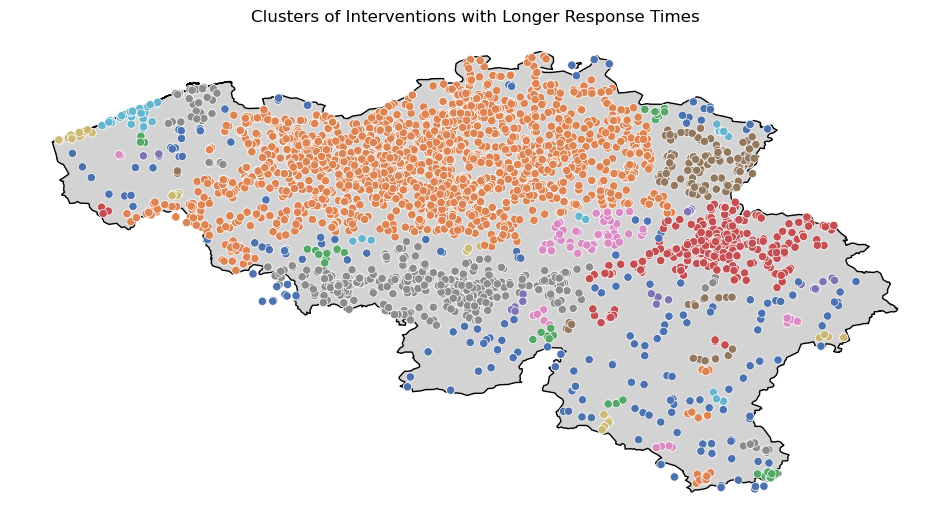

In [7]:
X = long_response_time[['Latitude', 'Longitude']]
X_scaled = StandardScaler().fit_transform(X)
dbscan = DBSCAN(eps=0.1, min_samples=5)
long_response_time['cluster'] = dbscan.fit_predict(X_scaled)

plt.figure(figsize=(12, 8))
belgium_boundary.plot(ax=plt.gca(), color='lightgrey', edgecolor='black')
sns.scatterplot(data=long_response_time, x='Longitude', y='Latitude', hue='cluster', palette='deep', legend=False)
plt.title('Clusters of Interventions with Longer Response Times')
plt.axis('off')
plt.show()


# 5. Analyze clusters

In [8]:
cluster_stats = long_response_time.groupby('cluster').agg({
    'Latitude': 'mean',
    'Longitude': 'mean',
    'T3-T0': 'mean',
    'distance_to_aed': 'mean',
    'Mission ID': 'count'
}).rename(columns={'Mission ID': 'Intervention_Count'})

cluster_stats = cluster_stats[cluster_stats.index != -1]  # Remove noise points
cluster_stats = cluster_stats.sort_values('Intervention_Count', ascending=False)

print("Top 10 clusters with longer response times:")
display(cluster_stats.head(10))

Top 10 clusters with longer response times:


,Latitude,Longitude,T3-T0,distance_to_aed,Intervention_Count
cluster,,,,,
0,50.996836,4.241569,18.352037,0.667312,3486
6,50.433960,4.302479,17.263530,0.604762,541
2,50.621906,5.602369,17.283637,0.602130,461
4,50.983507,5.539223,17.674120,0.595568,174
5,50.674029,5.007412,19.347020,1.168501,82
36,51.278505,3.186617,16.895278,0.536197,72
38,51.214503,2.924153,20.581975,0.389739,54
37,51.119923,2.653636,17.212819,0.402973,37
10,50.579122,3.400842,16.960316,0.502937,32


# 6. Visualize top 5 clusters

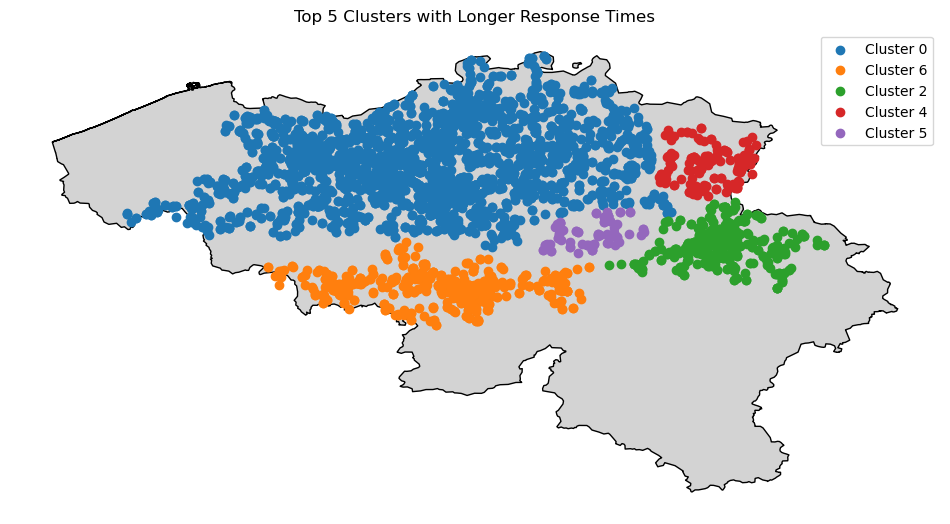

In [9]:
top_5_clusters = cluster_stats.head(5).index

plt.figure(figsize=(12, 8))
belgium_boundary.plot(ax=plt.gca(), color='lightgrey', edgecolor='black')
for cluster in top_5_clusters:
    cluster_data = long_response_time[long_response_time['cluster'] == cluster]
    plt.scatter(cluster_data['Longitude'], cluster_data['Latitude'], label=f'Cluster {cluster}')
plt.title('Top 5 Clusters with Longer Response Times')
plt.legend()
plt.axis('off')
plt.show()

# 7. Analyze AED density

Analyzing AED density...
Error calculating AED density: crs must be set to estimate UTM CRS.
Proceeding with grid analysis...


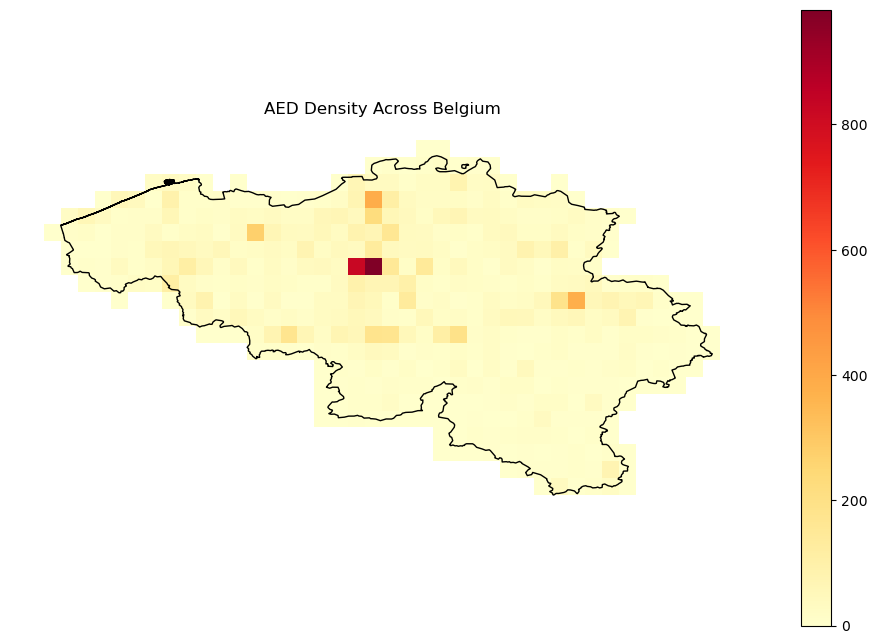

AED density analysis completed


In [13]:
# 7. Analyze AED density
print("Analyzing AED density...")

# Calculate Belgium area
try:
    belgium_area = belgium_boundary.to_crs(belgium_boundary.estimate_utm_crs()).area.sum() / 1e6  # in km²
    aed_density = len(gdf_aeds) / belgium_area
    print(f"AED density in Belgium: {aed_density:.2f} AEDs per km²")
except Exception as e:
    print(f"Error calculating AED density: {e}")
    print("Proceeding with grid analysis...")

# Create a grid over Belgium for AED density analysis
def create_grid(gdf, cell_size):
    xmin, ymin, xmax, ymax = gdf.total_bounds
    grid_cells = []
    for x0 in np.arange(xmin, xmax + cell_size, cell_size):
        for y0 in np.arange(ymin, ymax + cell_size, cell_size):
            x1 = x0 - cell_size
            y1 = y0 + cell_size
            grid_cells.append(box(x0, y0, x1, y1))
    return gpd.GeoDataFrame({'geometry': grid_cells}, crs=gdf.crs)

try:
    grid = create_grid(belgium_boundary, 0.1)  # 0.1 degree grid, adjust as needed
    grid = grid[grid.intersects(belgium_boundary.unary_union)]
    grid['aed_count'] = grid.apply(lambda cell: sum(gdf_aeds.intersects(cell.geometry)), axis=1)

    plt.figure(figsize=(12, 8))
    grid.plot(column='aed_count', cmap='YlOrRd', legend=True, ax=plt.gca())
    belgium_boundary.boundary.plot(ax=plt.gca(), color='black', linewidth=1)
    plt.title('AED Density Across Belgium')
    plt.axis('off')
    plt.show()
except Exception as e:
    print(f"Error creating or plotting grid: {e}")

print("AED density analysis completed")

## 3. AED Placement Optimization

Identifying areas needing improved AED coverage...
Number of interventions with above-median response time: 5589
Suggesting optimal new AED locations...
Visualizing existing and proposed AED locations...


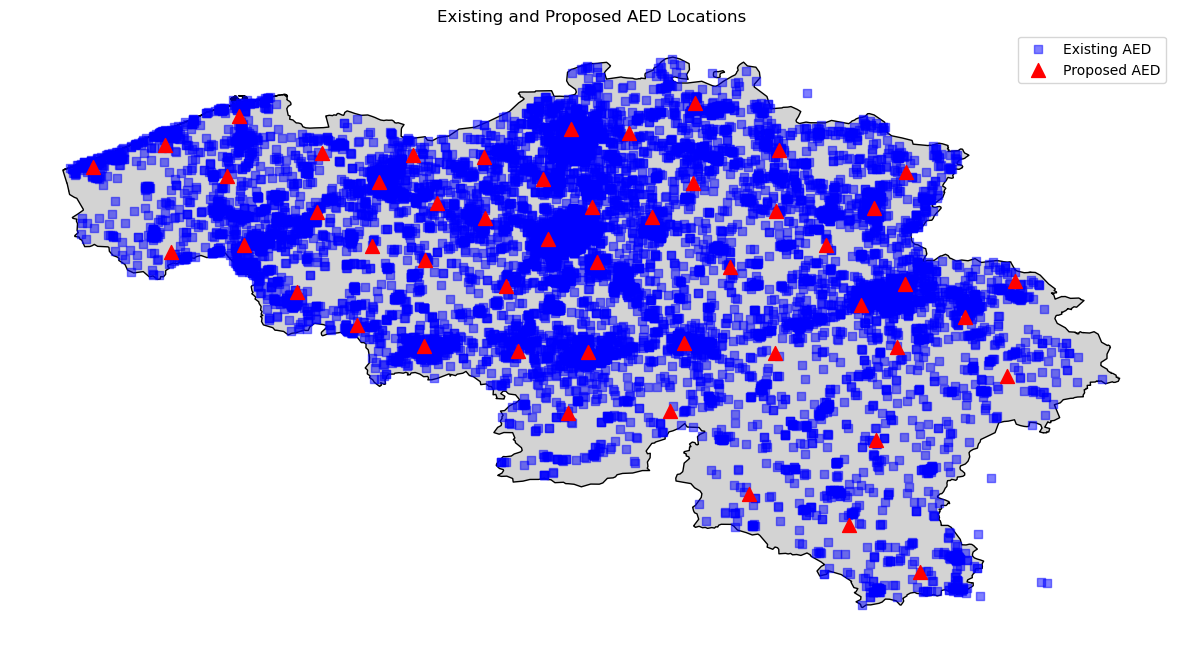

Evaluating improvement in coverage...
Current coverage: 100.00%
Coverage with proposed new AEDs: 100.00%
Improvement: 0.00 percentage points
Analyzing impact on response times...


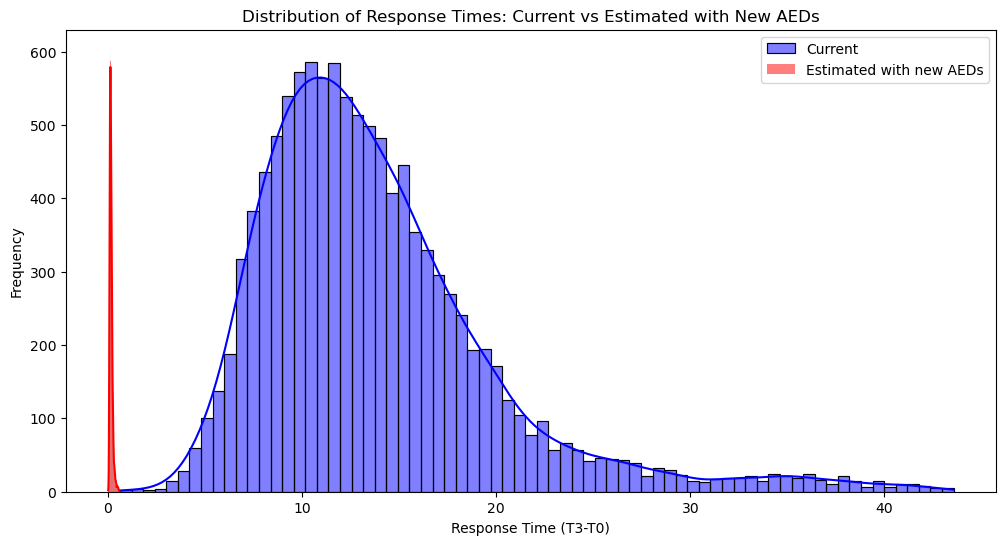

Current median response time: 12.59
Estimated median response time with new AEDs: 0.14
AED Placement Optimization analysis completed


In [14]:

import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial import cKDTree

# 1. Identify areas needing improved AED coverage
print("Identifying areas needing improved AED coverage...")

# Calculate the median response time
median_response_time = gdf_interventions['T3-T0'].median()

# Identify interventions with above-median response times
high_response_time = gdf_interventions[gdf_interventions['T3-T0'] > median_response_time]

print(f"Number of interventions with above-median response time: {len(high_response_time)}")

# 2. Use K-means clustering to suggest optimal new AED locations
print("Suggesting optimal new AED locations...")

def optimize_aed_placement(interventions, n_new_aeds):
    # Use K-means clustering to suggest optimal AED placements
    kmeans = KMeans(n_clusters=n_new_aeds, random_state=42)
    kmeans.fit(interventions[['Latitude', 'Longitude']])
    return pd.DataFrame(kmeans.cluster_centers_, columns=['Latitude', 'Longitude'])

# Suggest 50 new AED locations
n_new_aeds = 50
new_aed_locations = optimize_aed_placement(high_response_time, n_new_aeds)

# 3. Visualize existing and proposed AED locations
print("Visualizing existing and proposed AED locations...")

plt.figure(figsize=(15, 10))
belgium_boundary.plot(ax=plt.gca(), color='lightgrey', edgecolor='black')
plt.scatter(gdf_aeds['Longitude'], gdf_aeds['Latitude'], c='blue', marker='s', label='Existing AED', alpha=0.5)
plt.scatter(new_aed_locations['Longitude'], new_aed_locations['Latitude'], c='red', marker='^', s=100, label='Proposed AED')
plt.title('Existing and Proposed AED Locations')
plt.legend()
plt.axis('off')
plt.show()

# 4. Evaluate improvement in coverage
print("Evaluating improvement in coverage...")

def calculate_coverage(interventions, aeds, max_distance=1.0):
    tree = cKDTree(aeds[['Longitude', 'Latitude']])
    distances, _ = tree.query(interventions[['Longitude', 'Latitude']])
    return (distances <= max_distance).mean()

current_coverage = calculate_coverage(gdf_interventions, gdf_aeds)
new_coverage = calculate_coverage(gdf_interventions, pd.concat([gdf_aeds, new_aed_locations]))

print(f"Current coverage: {current_coverage:.2%}")
print(f"Coverage with proposed new AEDs: {new_coverage:.2%}")
print(f"Improvement: {(new_coverage - current_coverage) * 100:.2f} percentage points")

# 5. Analyze impact on response times
print("Analyzing impact on response times...")

def estimate_new_response_times(interventions, aeds, new_aeds):
    all_aeds = pd.concat([aeds, new_aeds])
    tree = cKDTree(all_aeds[['Longitude', 'Latitude']])
    new_distances, _ = tree.query(interventions[['Longitude', 'Latitude']])
    
    # Assume response time is proportional to distance
    distance_time_ratio = interventions['T3-T0'] / interventions['distance_to_aed']
    estimated_new_times = new_distances * distance_time_ratio
    
    return estimated_new_times

estimated_new_times = estimate_new_response_times(gdf_interventions, gdf_aeds, new_aed_locations)

plt.figure(figsize=(12, 6))
sns.histplot(data=gdf_interventions, x='T3-T0', kde=True, color='blue', alpha=0.5, label='Current')
sns.histplot(data=estimated_new_times, kde=True, color='red', alpha=0.5, label='Estimated with new AEDs')
plt.title('Distribution of Response Times: Current vs Estimated with New AEDs')
plt.xlabel('Response Time (T3-T0)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

print(f"Current median response time: {gdf_interventions['T3-T0'].median():.2f}")
print(f"Estimated median response time with new AEDs: {estimated_new_times.median():.2f}")

print("AED Placement Optimization analysis completed")

## 4. Cost-Benefit Analysis and Implementation Strategy

Estimating costs...
Estimated initial cost for 50 new AEDs: €100,000
Estimated annual maintenance cost: €5,000

Estimating benefits...
Estimated additional lives saved per year: 112

Performing cost-benefit analysis...


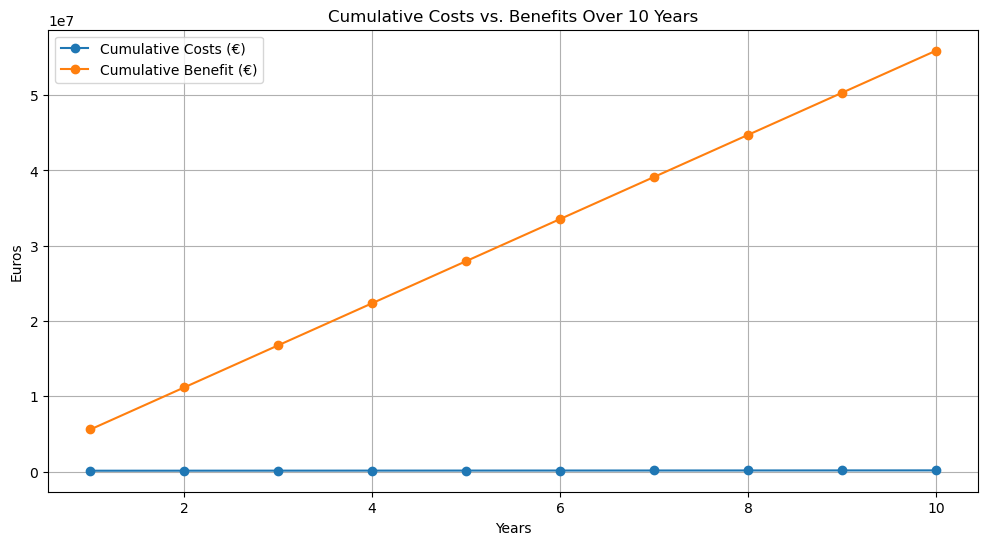

Estimated break-even point: 1.0 years

Developing implementation strategy...
Top 10 priority locations for new AEDs:


,Latitude,Longitude,priority_score
0,50.840002,4.323020,37902.097668
1,51.243392,4.407089,37770.456859
2,51.049793,3.707311,37220.121462
3,51.058253,4.306956,29332.518510
4,50.955667,4.484649,28580.191354
5,50.915392,4.093101,27607.926176
6,50.426896,4.470397,26489.859934
7,50.757833,4.503268,25853.807338
8,50.675099,5.625534,25441.346213
9,51.139422,4.090711,25329.047658


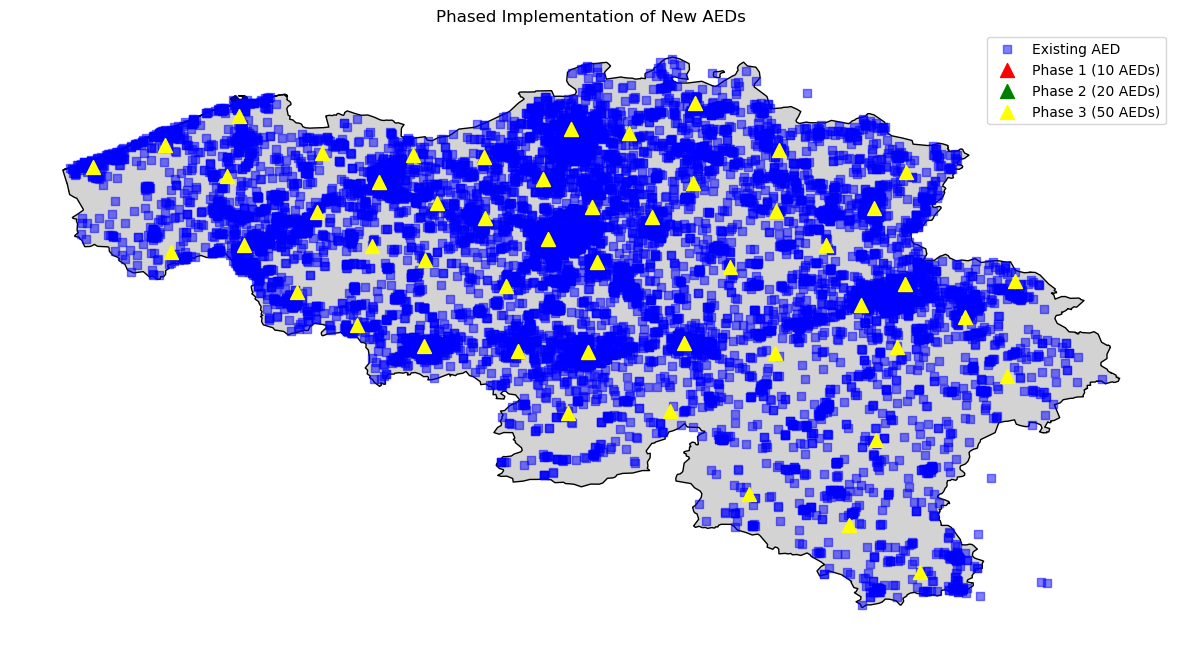


Recommendations:
1. Implement the AED placement plan in phases, starting with the highest priority locations.
2. Conduct community awareness campaigns to educate the public about AED locations and usage.
3. Partner with local businesses and organizations to potentially share costs and increase accessibility.
4. Regularly review and update the AED network based on new data and changing demographics.
5. Integrate the AED network with emergency response systems for quicker activation during emergencies.

Cost-Benefit Analysis and Implementation Strategy completed


In [15]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Cost Estimation
print("Estimating costs...")

# Assume average cost per AED
aed_cost = 1500  # in euros
installation_cost = 500  # in euros per AED
maintenance_cost_per_year = 100  # in euros per AED per year

n_new_aeds = len(new_aed_locations)
total_initial_cost = n_new_aeds * (aed_cost + installation_cost)
annual_maintenance_cost = n_new_aeds * maintenance_cost_per_year

print(f"Estimated initial cost for {n_new_aeds} new AEDs: €{total_initial_cost:,}")
print(f"Estimated annual maintenance cost: €{annual_maintenance_cost:,}")

# 2. Benefit Estimation
print("\nEstimating benefits...")

# Assume improvement in survival rate
current_survival_rate = 0.10  # 10% survival rate for out-of-hospital cardiac arrests
estimated_improvement = 0.05  # 5 percentage point improvement with better AED coverage

annual_cardiac_arrests = len(gdf_interventions) // 5  # Assume data covers 5 years
current_survivors = annual_cardiac_arrests * current_survival_rate
estimated_new_survivors = annual_cardiac_arrests * (current_survival_rate + estimated_improvement)
additional_survivors = estimated_new_survivors - current_survivors

print(f"Estimated additional lives saved per year: {additional_survivors:.0f}")

# 3. Cost-Benefit Analysis
print("\nPerforming cost-benefit analysis...")

years = range(1, 11)  # Analyze for 10 years
cumulative_costs = [total_initial_cost + annual_maintenance_cost * year for year in years]
cumulative_lives_saved = [additional_survivors * year for year in years]

plt.figure(figsize=(12, 6))
plt.plot(years, cumulative_costs, marker='o', label='Cumulative Costs (€)')
plt.plot(years, [life * 50000 for life in cumulative_lives_saved], marker='o', label='Cumulative Benefit (€)')
plt.title('Cumulative Costs vs. Benefits Over 10 Years')
plt.xlabel('Years')
plt.ylabel('Euros')
plt.legend()
plt.grid(True)
plt.show()

# Calculate break-even point
break_even_year = np.ceil(total_initial_cost / (additional_survivors * 50000 - annual_maintenance_cost))
print(f"Estimated break-even point: {break_even_year:.1f} years")

# 4. Implementation Strategy
print("\nDeveloping implementation strategy...")

# Prioritize AED placements
new_aed_locations['priority_score'] = new_aed_locations.apply(
    lambda row: sum(1 / ((row['Latitude'] - gdf_interventions['Latitude'])**2 + 
                         (row['Longitude'] - gdf_interventions['Longitude'])**2) ** 0.5),
    axis=1
)

new_aed_locations_prioritized = new_aed_locations.sort_values('priority_score', ascending=False).reset_index(drop=True)

print("Top 10 priority locations for new AEDs:")
display(new_aed_locations_prioritized.head(10))

# Visualize phased implementation
plt.figure(figsize=(15, 10))
belgium_boundary.plot(ax=plt.gca(), color='lightgrey', edgecolor='black')
plt.scatter(gdf_aeds['Longitude'], gdf_aeds['Latitude'], c='blue', marker='s', label='Existing AED', alpha=0.5)

phases = [10, 20, 50]  # Number of AEDs to install in each phase
colors = ['red', 'green', 'yellow']
for i, phase in enumerate(phases):
    phase_aeds = new_aed_locations_prioritized.iloc[:phase]
    plt.scatter(phase_aeds['Longitude'], phase_aeds['Latitude'], 
                c=colors[i], marker='^', s=100, label=f'Phase {i+1} ({phase} AEDs)')

plt.title('Phased Implementation of New AEDs')
plt.legend()
plt.axis('off')
plt.show()

# 5. Recommendations
print("\nRecommendations:")
print("1. Implement the AED placement plan in phases, starting with the highest priority locations.")
print("2. Conduct community awareness campaigns to educate the public about AED locations and usage.")
print("3. Partner with local businesses and organizations to potentially share costs and increase accessibility.")
print("4. Regularly review and update the AED network based on new data and changing demographics.")
print("5. Integrate the AED network with emergency response systems for quicker activation during emergencies.")

print("\nCost-Benefit Analysis and Implementation Strategy completed")